# Movie Recommendation Systems:

     Types of Recommendation Systems:
1. `Content-Based Filtering:`
    Recommends items similar to those the user liked in the past.

2. `Collaborative Filtering:`
    Recommends items based on what similar users liked.
    based on user ratings — if available
        Two types:
    User-based Collaborative Filtering
    Item-based Collaborative Filtering

3. `Hybrid Recommendation:`
    Combines Content-Based and Collaborative Filtering.


In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
df = pd.read_csv(r"C:\Users\91944\AI-Jupiterdocs\datasets\movie_recommendations.csv")
df.head(3)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [159]:
#DATA ANALYSIS

df['genres'].value_counts().head()

genres
Drama             370
Comedy            282
Drama Romance     164
Comedy Romance    144
Comedy Drama      142
Name: count, dtype: int64

In [160]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [165]:
df['genres'].unique()
# df['original_language'].unique()

array(['Action Adventure Fantasy Science Fiction',
       'Adventure Fantasy Action', 'Action Adventure Crime', ...,
       'Thriller Horror Comedy', 'Foreign Thriller',
       'Comedy Drama Romance TV Movie'], dtype=object)

In [168]:
df.shape

(4803, 24)

In [170]:
# df1 = df.drop(['index', 'homepage','crew'],axis='columns')
# df1

df1 = df.drop(['index', 'homepage','id','keywords','original_language', 'overview','production_companies','status', 'production_countries', 'spoken_languages', 'tagline', 'crew'],axis='columns')

print(df1.shape)
df1.head()

(4803, 12)


,budget,genres,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,director
0,237000000,Action Adventure Fantasy Science Fiction,Avatar,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,300000000,Adventure Fantasy Action,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,245000000,Action Adventure Crime,Spectre,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,250000000,Action Crime Drama Thriller,The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,260000000,Action Adventure Science Fiction,John Carter,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton


### DATA CLEANING: HANDLING MISSING VALUES

In [174]:
print(df1.shape)
df1.isnull().sum()

(4803, 12)


budget             0
genres            28
original_title     0
popularity         0
release_date       1
revenue            0
runtime            2
title              0
vote_average       0
vote_count         0
cast              43
director          30
dtype: int64

In [176]:
df2 = df1.dropna()
df2.head()

,budget,genres,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,director
0,237000000,Action Adventure Fantasy Science Fiction,Avatar,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,300000000,Adventure Fantasy Action,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,245000000,Action Adventure Crime,Spectre,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,250000000,Action Crime Drama Thriller,The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,260000000,Action Adventure Science Fiction,John Carter,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton


In [178]:
#checking the null for new dataframe df2

print(df2.shape)
df2.isnull().sum()

# df = df[['title', 'genres', 'director', 'cast', 'vote_average']]
# df

(4738, 12)


budget            0
genres            0
original_title    0
popularity        0
release_date      0
revenue           0
runtime           0
title             0
vote_average      0
vote_count        0
cast              0
director          0
dtype: int64

In [180]:
print(df2.describe())

             budget   popularity       revenue      runtime  vote_average  \
count  4.738000e+03  4738.000000  4.738000e+03  4738.000000   4738.000000   
mean   2.943653e+07    21.783807  8.338109e+07   107.408611      6.123449   
std    4.086174e+07    31.935986  1.636868e+08    21.746884      1.104739   
min    0.000000e+00     0.000372  0.000000e+00     0.000000      0.000000   
25%    1.000000e+06     4.982935  0.000000e+00    94.000000      5.600000   
50%    1.500000e+07    13.295098  1.996202e+07   104.000000      6.200000   
75%    4.000000e+07    28.670406  9.452796e+07   118.000000      6.800000   
max    3.800000e+08   875.581305  2.787965e+09   338.000000     10.000000   

         vote_count  
count   4738.000000  
mean     699.649852  
std     1240.379775  
min        0.000000  
25%       58.000000  
50%      242.000000  
75%      750.750000  
max    13752.000000  


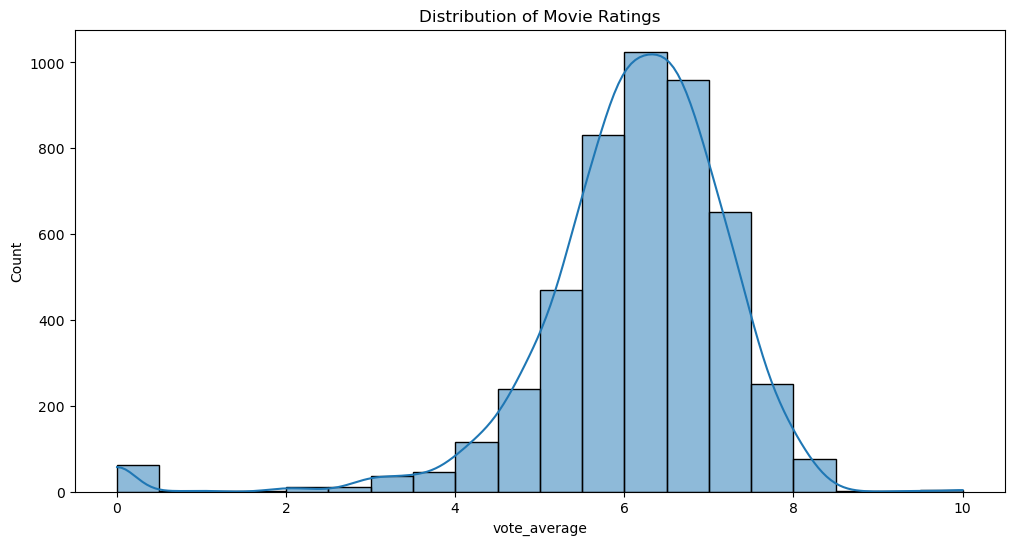

In [182]:
# Plot distributions
plt.figure(figsize=(12, 6))
sns.histplot(df['vote_average'], bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.show()

### Used randomforest and done feature imporatnce on the dataset

In [185]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [187]:
# --- Feature Engineering ---

# Convert genres string to list safely (comma-separated assumption)
df['genres'] = df['genres'].apply(
    lambda x: [genre.strip() for genre in x.split(',')] if isinstance(x, str) else []
)

# Number of genres
df['num_genres'] = df['genres'].apply(len)

# Is popular director
df['is_popular_director'] = df['director'].apply(
    lambda x: 1 if x in ['James Cameron', 'Christopher Nolan'] else 0
)

In [189]:
 #Feature Selection
# Select features and target
X = df[['budget', 'runtime', 'num_genres', 'is_popular_director', 'vote_count']]
y = df['vote_average']

# Fill missing values (if any)
X.fillna(0, inplace=True)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [191]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [192]:
# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# --- Feature Importance ---

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:\n", feature_importance)

RMSE: 0.84
R² Score: 0.53

Feature Importance:
                Feature  Importance
4           vote_count    0.611736
1              runtime    0.234090
0               budget    0.146462
2           num_genres    0.007640
3  is_popular_director    0.000071


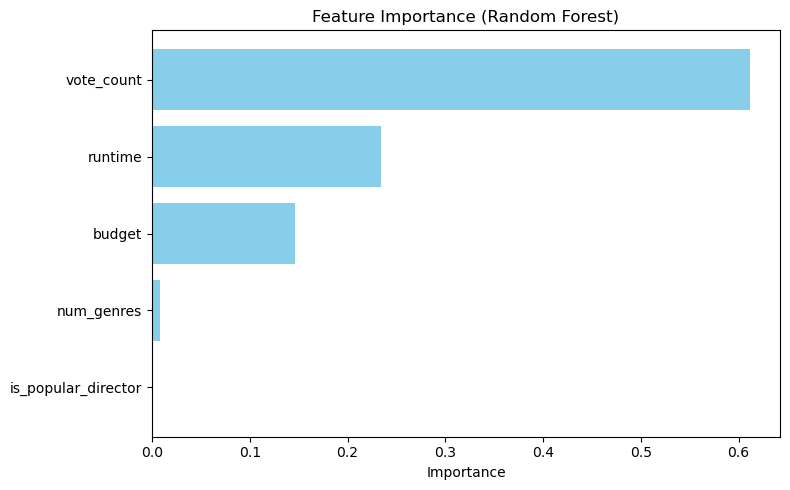

In [193]:
# --- Optional: Plot Feature Importance ---

plt.figure(figsize=(8, 5))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

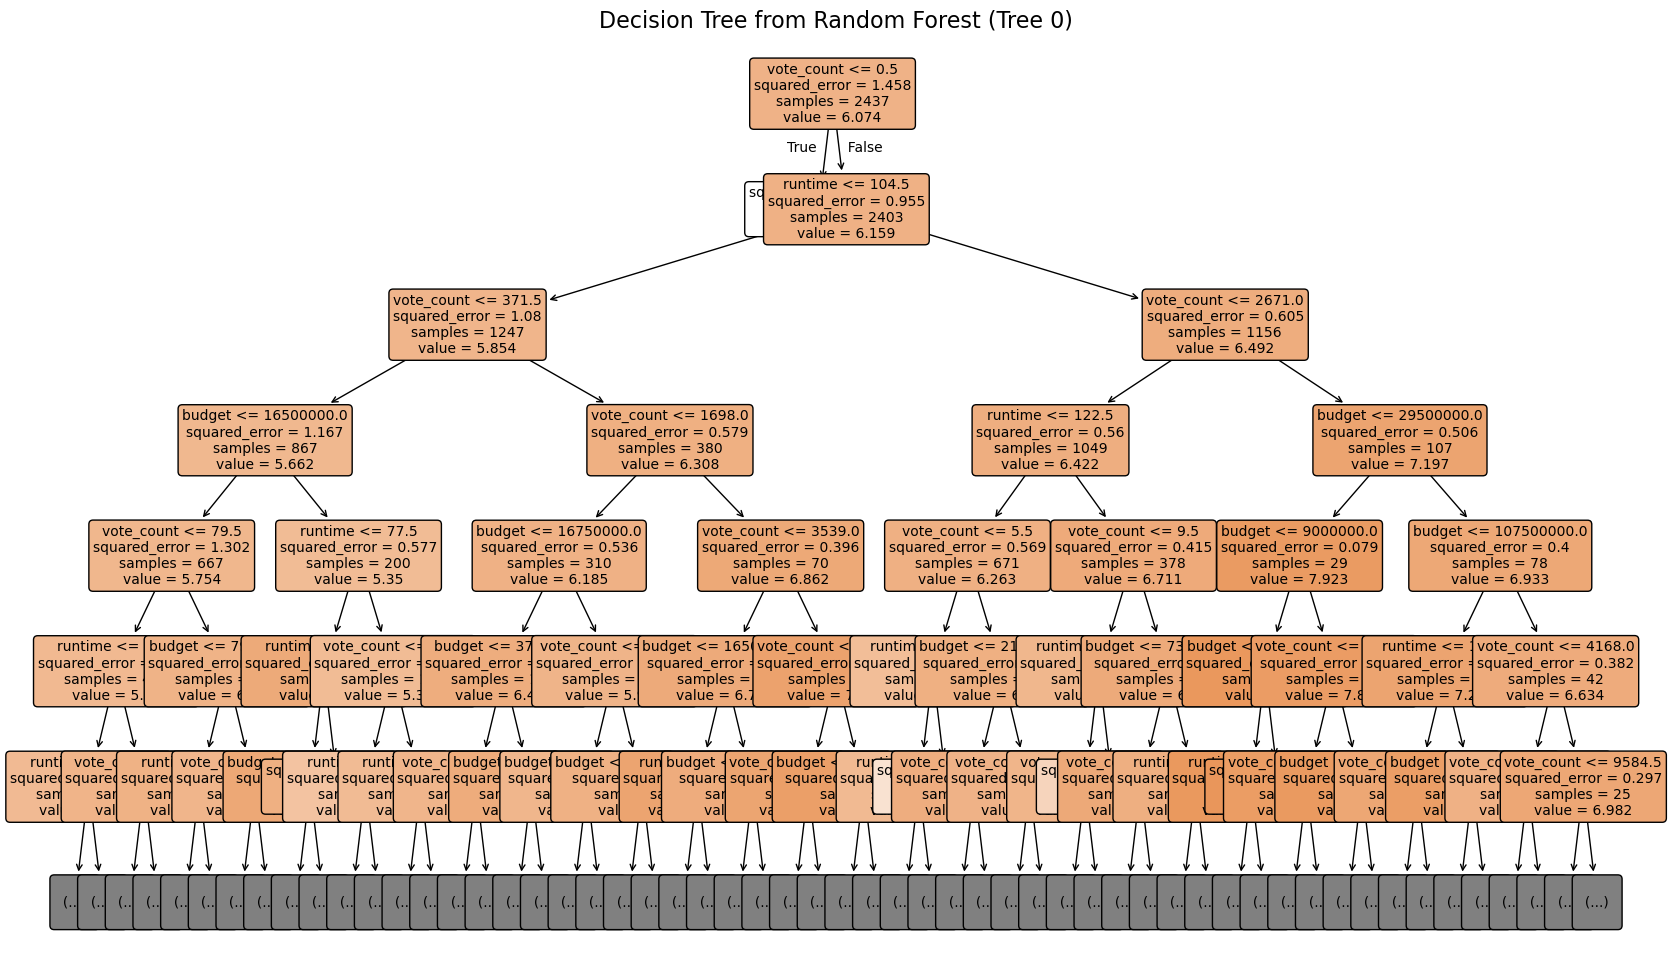

In [197]:
 from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Select one tree from the Random Forest
estimator = model.estimators_[0]  # Pick the first tree

# Plot the tree
plt.figure(figsize=(20, 12))  # Adjust size as needed
plot_tree(estimator,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          fontsize=10,  max_depth=6)
plt.title("Decision Tree from Random Forest (Tree 0)", fontsize=16)
plt.show()


In [198]:
# Basic statistics
print(df.describe())

             index        budget             id   popularity       revenue  \
count  4803.000000  4.803000e+03    4803.000000  4803.000000  4.803000e+03   
mean   2401.000000  2.904504e+07   57165.484281    21.492301  8.226064e+07   
std    1386.651002  4.072239e+07   88694.614033    31.816650  1.628571e+08   
min       0.000000  0.000000e+00       5.000000     0.000000  0.000000e+00   
25%    1200.500000  7.900000e+05    9014.500000     4.668070  0.000000e+00   
50%    2401.000000  1.500000e+07   14629.000000    12.921594  1.917000e+07   
75%    3601.500000  4.000000e+07   58610.500000    28.313505  9.291719e+07   
max    4802.000000  3.800000e+08  459488.000000   875.581305  2.787965e+09   

           runtime  vote_average    vote_count   num_genres  \
count  4801.000000   4803.000000   4803.000000  4803.000000   
mean    106.875859      6.092172    690.217989     0.994170   
std      22.611935      1.194612   1234.585891     0.076137   
min       0.000000      0.000000      0.00000

### CONTENT-BASED FILTERING

In [201]:
# Importing necessary lybraries

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [202]:
# Load your cleaned dataset
dfs = pd.read_csv(r"C:\Users\91944\AI-Jupiterdocs\datasets\movie_recommendations.csv")

# Drop unnecessary columns
dfs1 = dfs.drop([
    'index','homepage','id','keywords','original_language','overview',
    'production_companies','status','production_countries','spoken_languages',
    'tagline','crew'], axis='columns')

# Drop missing values
dfs2 = dfs1.dropna()


In [203]:
#FUNCTION TO PROCESS TEXT FEATURES

def process_text(text):
    if isinstance(text, str):
        # For genres - split into list and remove spaces
        return [genre.replace(" ", "") for genre in text.split()]
    return []

# Process genres, cast, and director
dfs2['genres'] = dfs2['genres'].apply(process_text)
dfs2['cast'] = dfs2['cast'].apply(lambda x: x.split(", ")[:3])  # Get top 3 cast members
dfs2['director'] = dfs2['director'].apply(lambda x: x.replace(" ", "") if isinstance(x, str) else '') #Remove spaces in director names

# Create tags by combining features
dfs2['tags'] = dfs2.apply(lambda row: " ".join(row['genres'] + row['cast'] + [row['director']]), axis=1)
dfs2['tags'] = dfs2['tags'].str.lower()

# This is the core idea behind content-based filtering — 
# Where turning movie metadata into a unified text format to find similarities.


In [204]:

# Vectorization
cv = CountVectorizer(max_features=5000, stop_words='english')
vectors = cv.fit_transform(dfs2['tags']).toarray()

# Similarity matrix
similarity = cosine_similarity(vectors)

# Recommendation function
def recommend(movie):
    if movie not in dfs2['title'].values:
        return "Movie not found in our database."

    index = dfs2[dfs2['title'] == movie].index[0]
    distances = list(enumerate(similarity[index]))
    distances = sorted(distances, key=lambda x: x[1], reverse=True)[1:6]  # Top 5 similar movies
    
    recommended_movies = [dfs2.iloc[i[0]].title for i in distances]
    return recommended_movies

# Example usage
print("Movies similar to 'Harry Potter and the Half-Blood Prince':\n")
print(recommend('Harry Potter and the Half-Blood Prince'))

Movies similar to 'Harry Potter and the Half-Blood Prince':

['Harry Potter and the Order of the Phoenix', 'Harry Potter and the Goblet of Fire', "Harry Potter and the Philosopher's Stone", 'Harry Potter and the Chamber of Secrets', 'Harry Potter and the Prisoner of Azkaban']


#### The system compares metadata like title, synopsis, characters, director, and keywords.

#### It identifies that all Harry Potter films share key elements like fantasy, magic, school setting, and recurring characters.

#### The recommendations reflect franchise-awareness, where it recognizes Harry Potter as a series.

In [208]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [210]:
#TAGS is the engine behind Content-Based Filtering — it fuses multiple movie features into one string for similarity comparison.

# Create tags column from metadata
if 'tags' not in df.columns:
    df['genres'] = df['genres'].fillna('').astype(str)
    df['cast'] = df['cast'].fillna('').astype(str)
    df['director'] = df['director'].fillna('').astype(str)
    df['tags'] = df['genres'] + ' ' + df['cast'] + ' ' + df['director']

# Lowercase all tags-Normalize 
df['tags'] = df['tags'].str.lower()


In [213]:

# Vectorize with TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['tags'])

# Calculate cosine similarity
similarity_matrix = cosine_similarity(tfidf_matrix)

# Recommendation function
def recommend_movie(movie_title, top_n=5):
    if movie_title not in df['title'].values:
        return f"Movie '{movie_title}' not found in dataset."

    idx = df[df['title'] == movie_title].index[0]
    sim_scores = list(enumerate(similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_movies = sim_scores[1:top_n+1]
    recommended_titles = [df.iloc[i[0]]['title'] for i in top_movies]
    return recommended_titles

# Example
movie = 'Up'
recommendations = recommend_movie(movie, top_n=5)
print(f"\nTop 5 movies similar to '{movie}':")
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")



Top 5 movies similar to 'Up':
1. Monsters, Inc.
2. Inside Out
3. Broken Arrow
4. A Beautiful Mind
5. The Last Castle


#### The top two (Pixar movies) share animation, emotional storytelling, and family-friendly tone with Up.
#### System filtered recommendations by genre, tone, or target age group.

In [215]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director', 'num_genres',
       'is_popular_director', 'tags'],
      dtype='object')

### COLLABARATIVE-BASED FILTERING